In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

2025-11-19 08:16:51.878659: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763540212.138334      81 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763540212.229654      81 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train/255.0
x_test=x_test/255.0
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-11-19 08:17:14.251297: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
             metrics=['accuracy'])

In [5]:
model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8753 - loss: 0.4389
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9647 - loss: 0.1225
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9765 - loss: 0.0797
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9824 - loss: 0.0572
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9867 - loss: 0.0428
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9896 - loss: 0.0345
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9923 - loss: 0.0244
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9941 - loss: 0.0209
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9952 - loss: 0.0162
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9962 - loss: 0.0134


In [6]:
loss,accuracy=model.evaluate(x_test,y_test)
print("Test Accuracy:",accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9743 - loss: 0.0929
Test Accuracy: 0.9796000123023987


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


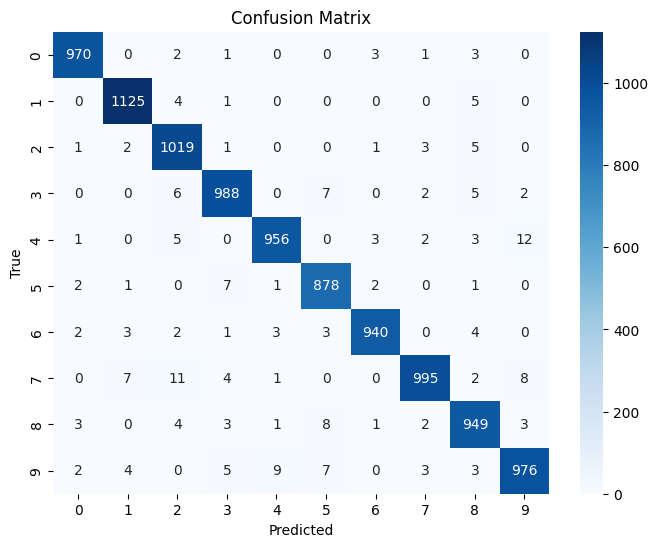

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [7]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("Classification Report:")
print(classification_report(y_true, y_pred))

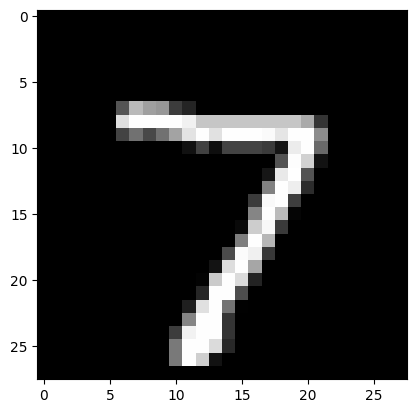

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted: 7


In [8]:
plt.imshow(x_test[0],cmap='gray')
plt.show()
pred = model.predict(np.array([x_test[0]]))
print("Predicted:", np.argmax(pred))


In [9]:
x_train=x_train.reshape((60000,28,28,1)).astype('float32')/255
x_test=x_test.reshape((10000,28,28,1)).astype('float32')/255


In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.4284 - loss: 1.6021 - val_accuracy: 0.9228 - val_loss: 0.2706
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.8910 - loss: 0.3585 - val_accuracy: 0.9607 - val_loss: 0.1408
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9311 - loss: 0.2262 - val_accuracy: 0.9688 - val_loss: 0.1075
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9505 - loss: 0.1656 - val_accuracy: 0.9750 - val_loss: 0.0883
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9580 - loss: 0.1368 - val_accuracy: 0.9762 - val_loss: 0.0830
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9619 - loss: 0.1205 - val_accuracy: 0.9787 - val_loss: 0.0732
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9653 - loss: 0.1148 - val_accuracy: 0.9782 - val_loss: 0.0763
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9676 - loss: 0.1043 - 

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9765 - loss: 0.0707
Test Accuracy: 0.9812999963760376
Test Loss: 0.05854647234082222


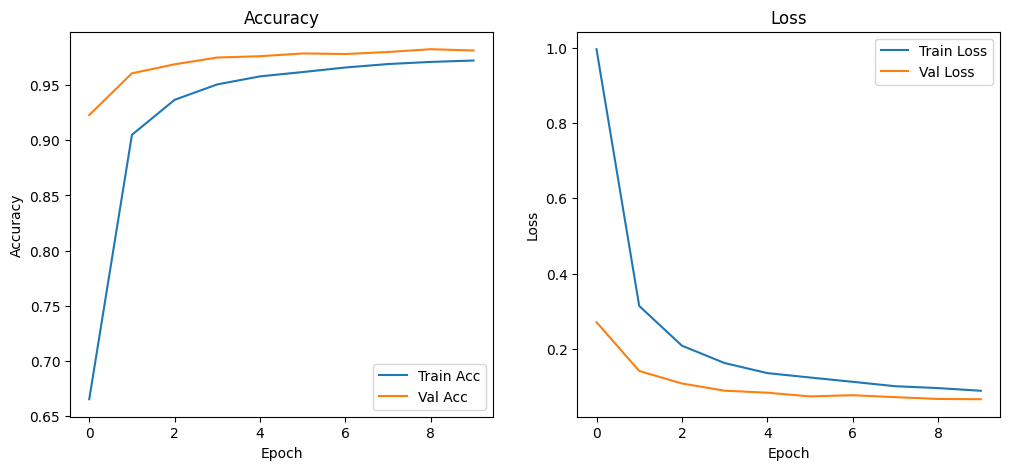

In [13]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


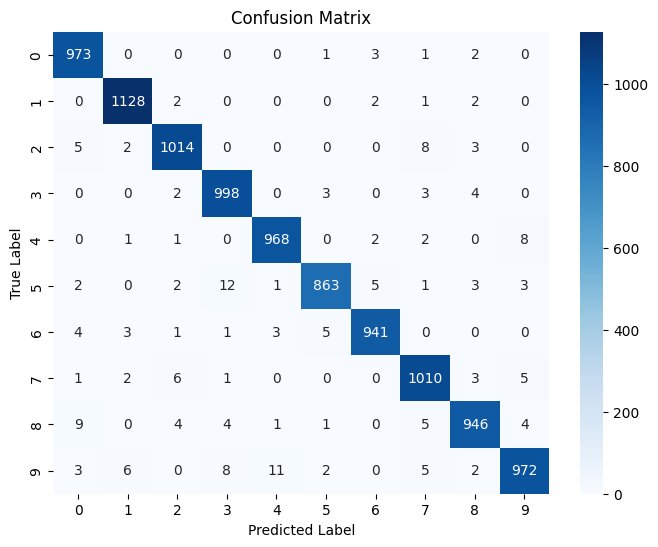

In [14]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


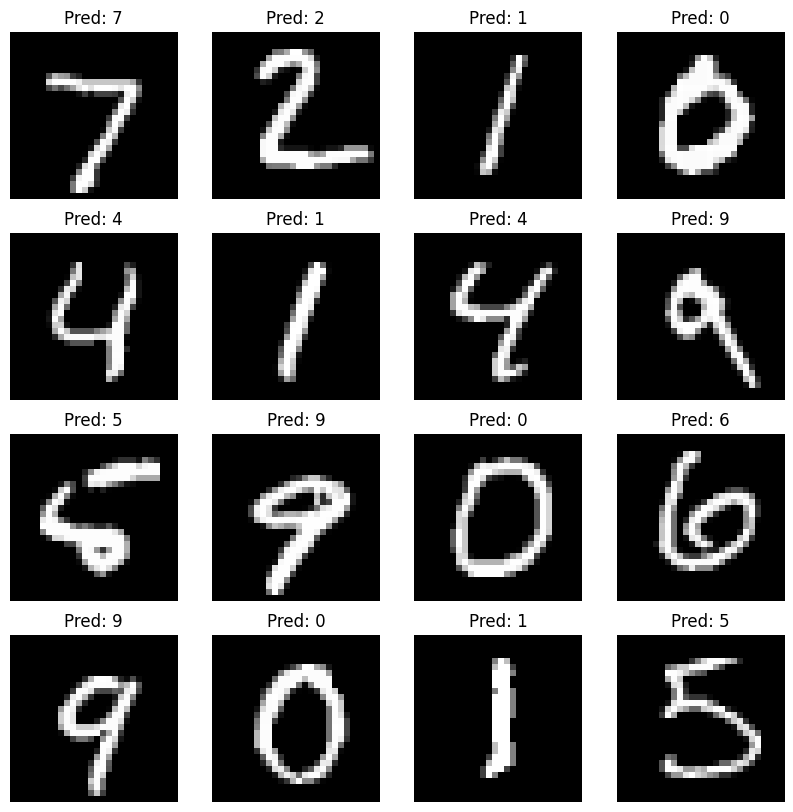

In [15]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {y_pred_classes[i]}")
    plt.axis('off')
plt.show()
